In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import pandas as pd

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Check the temperatures for June and December for all datapoints
from sqlalchemy import extract
session = Session(engine)
june_temp= session.query(Measurement.date,Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
june_tempDF = pd.DataFrame(june_temp,columns=['date','June temperature']).sort_index()
june_tempDF = june_tempDF.groupby(june_tempDF['date'].str.slice(0,4)).mean()
dec_temp= session.query(Measurement.date,Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
dec_tempDF = pd.DataFrame(dec_temp,columns=['date','December temperature'])
dec_tempDF = dec_tempDF.groupby(dec_tempDF['date'].str.slice(0,4)).mean()


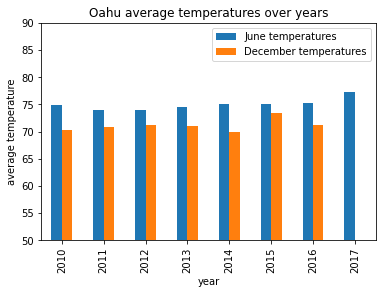

In [4]:
plotdata = pd.DataFrame({
    "June temperatures":june_tempDF['June temperature'],
    "December temperatures":dec_tempDF['December temperature']
    }, 
    index=june_tempDF.index
)
plotdata.plot(kind="bar",title="Oahu average temperatures over years",xlabel="year",ylabel="average temperature",ylim=[50,90])


In [8]:
june_prcpDF.head()

,date,precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00


In [11]:
# Check the precipitations using datapoints from the station with highest number of datapoints
# for the month of June
from sqlalchemy import extract
session = Session(engine)
june_prcp = session.query(Measurement.date,Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_prcpDF = pd.DataFrame(june_prcp,columns = ['date','June precipitation']).sort_index()
june_prcpDF = june_prcpDF.groupby(june_prcpDF['date'].str.slice(0,4)).mean()
dec_prcp = session.query(Measurement.date,Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_prcpDF = pd.DataFrame(dec_prcp,columns = ['date','December precipitation']).sort_index()
dec_prcpDF = dec_prcpDF.groupby(dec_prcpDF['date'].str.slice(0,4)).mean()


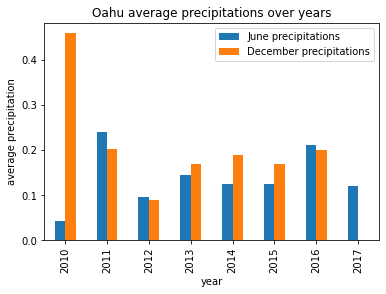

In [13]:
plotdata = pd.DataFrame({
    "June precipitations":june_prcpDF['June precipitation'],
    "December precipitations":dec_prcpDF['December precipitation']
    }, 
    index=june_prcpDF.index
)
plotdata.plot(kind="bar",title="Oahu average precipitations over years",xlabel="year",ylabel="average precipitation")
